In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [2]:
data = pd.read_csv('Countries PPP.csv')

In [3]:
data.tail()

,Year,EGY,GHA,MYS,NGA,ZAF
46,2016,11192.37301,4844.658221,25546.12952,5234.679127,12591.59185
47,2017,11014.48648,4983.688856,26661.50742,5190.356127,12701.34893
48,2018,11639.23909,5302.204005,28219.80261,5278.848395,12931.12276
49,2019,12260.72054,5625.099220,29564.00827,5352.679423,13009.66863
50,2020,12607.76223,5596.307120,27886.86114,5186.723530,12095.85640


In [7]:
data.isnull().sum()

Year    0
EGY     0
GHA     0
MYS     0
NGA     0
ZAF     0
dtype: int64

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    51 non-null     int64  
 1   EGY     51 non-null     float64
 2   GHA     51 non-null     float64
 3   MYS     51 non-null     float64
 4   NGA     51 non-null     float64
 5   ZAF     51 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 2.5 KB


In [98]:
data.corr()

,Year,EGY,GHA,MYS,NGA,ZAF
Year,1.000000,0.964940,0.228590,0.957582,-0.116204,0.687867
EGY,0.964940,1.000000,0.418137,0.987251,0.086193,0.782553
GHA,0.228590,0.418137,1.000000,0.479867,0.708458,0.741254
MYS,0.957582,0.987251,0.479867,1.000000,0.134926,0.836734
NGA,-0.116204,0.086193,0.708458,0.134926,1.000000,0.486422
ZAF,0.687867,0.782553,0.741254,0.836734,0.486422,1.000000


In [ ]:
data['Year'] = data['Year'].astype(str).head()

In [108]:
data['Year'] = pd.to_datetime(data['Year'], format = '%Y%m%d')

In [109]:
data.dtypes

Year    datetime64[ns]
EGY            float64
GHA            float64
MYS            float64
NGA            float64
ZAF            float64
dtype: object

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Year    5 non-null      datetime64[ns]
 1   EGY     51 non-null     float64       
 2   GHA     51 non-null     float64       
 3   MYS     51 non-null     float64       
 4   NGA     51 non-null     float64       
 5   ZAF     51 non-null     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 2.5 KB


In [55]:
correlation = data.corr()

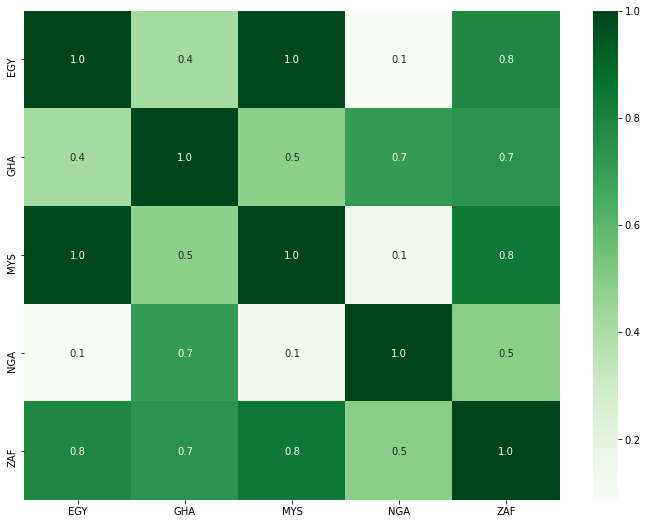

In [84]:
plt.figure(figsize = (12,9))
sns.heatmap(correlation, cbar = True, annot = True, fmt = '.1f', cmap = 'Greens')

In [124]:
data.head()

,Year,EGY,GHA,MYS,NGA,ZAF
0,1970,1079.49,4242.51,3256.32,4532.67,7706.42
1,1971,1075.69,4225.36,3765.00,4938.75,7614.59
2,1972,1118.88,3520.87,3839.96,5177.46,7733.44
3,1973,1104.35,3890.95,4511.47,5757.14,8629.70
4,1974,1194.05,4210.50,4817.29,6562.21,8927.96


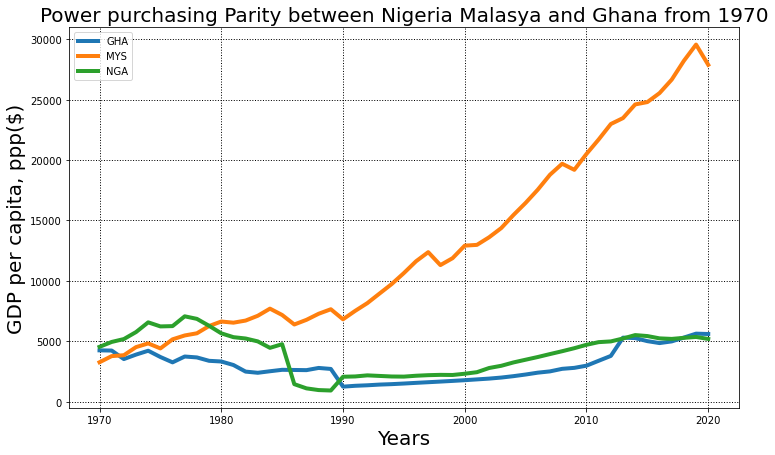

In [153]:
plt.figure(figsize = (12, 7))
#plt.plot(data.Year, data.EGY, linewidth = 4)
plt.plot(data.Year, data.GHA, linewidth = 4)
plt.plot(data.Year, data.MYS, linewidth = 4)
plt.plot(data.Year, data.NGA, linewidth = 4)
#plt.plot(data.Year, data.ZAF, linewidth = 2)
plt.legend(['GHA', 'MYS','NGA', 'NGA', 'ZAF'])
plt.xlabel('Years', size = 20)
plt.ylabel('GDP per capita, ppp($)', size = 20)
plt.grid( color = 'black', linestyle = ':', linewidth = 1)
plt.title('Power purchasing Parity between Nigeria Malasya and Ghana from 1970', size = 20)
plt.show()

In [41]:
data.head()

,Year,EGY,GHA,MYS,NGA,ZAF
0,1970,1079.49,4242.51,3256.32,4532.67,7706.42
1,1971,1075.69,4225.36,3765.00,4938.75,7614.59
2,1972,1118.88,3520.87,3839.96,5177.46,7733.44
3,1973,1104.35,3890.95,4511.47,5757.14,8629.70
4,1974,1194.05,4210.50,4817.29,6562.21,8927.96


In [309]:
newdata = data[['Year','NGA']]
newdata2 = newdata[30:51]
newdata2

,Year,NGA
30,2000,2306.114523
31,2001,2434.246219
32,2002,2780.792298
33,2003,2964.362992
34,2004,3241.724496
35,2005,3467.105156
36,2006,3690.840249
37,2007,3934.842537
38,2008,4170.732914
39,2009,4420.974011


In [295]:
newdata3 = newdata[19:30]
newdata3

,Year,NGA
19,1989,917.460000
20,1990,2057.822070
21,1991,2081.365602
22,1992,2171.923772
23,1993,2124.306810
24,1994,2077.831582
25,1995,2067.729076
26,1996,2140.006355
27,1997,2187.135005
28,1998,2213.016657


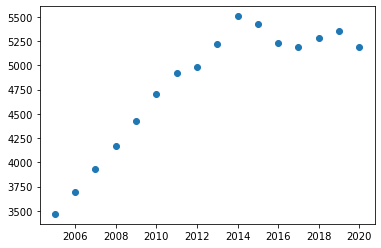

In [296]:
plt.scatter(newdata2.Year, newdata2.NGA)
plt.show()

In [297]:
reg = linear_model.LinearRegression()

In [298]:
model = reg.fit(newdata2[['Year']], newdata2.NGA)

In [299]:
newdata4 = newdata3['Year']

In [300]:
newdata5 = newdata3['NGA']
newdata5.head()

19     917.460000
20    2057.822070
21    2081.365602
22    2171.923772
23    2124.306810
Name: NGA, dtype: float64

In [301]:
newdata4 = pd.DataFrame(newdata4)
newdata5 = pd.DataFrame(newdata5)

In [302]:
predict = model.predict(newdata4)
predict

array([1936.61495244, 2058.18269185, 2179.75043127, 2301.31817069,
       2422.88591011, 2544.45364952, 2666.02138894, 2787.58912836,
       2909.15686778, 3030.72460719, 3152.29234661])

In [303]:
model.predict([[2021]])


array([5826.7826138])

In [304]:
model.score(newdata2[['Year']], newdata2.NGA)

0.7789157751318182

In [305]:
newdata3

,Year,NGA
19,1989,917.460000
20,1990,2057.822070
21,1991,2081.365602
22,1992,2171.923772
23,1993,2124.306810
24,1994,2077.831582
25,1995,2067.729076
26,1996,2140.006355
27,1997,2187.135005
28,1998,2213.016657


In [306]:
metrics.r2_score(newdata5, predict )

-2.0888040863017423

In [307]:
newdata2.tail()

,Year,NGA
46,2016,5234.679127
47,2017,5190.356127
48,2018,5278.848395
49,2019,5352.679423
50,2020,5186.723530


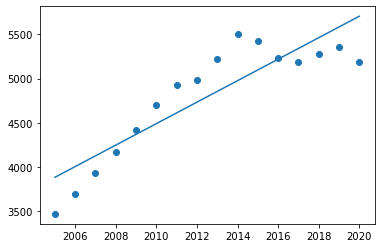

In [308]:
plt.scatter(newdata2.Year, newdata2.NGA)
plt.plot(newdata2.Year, model.predict(newdata2[['Year']]))
plt.show()

In [ ]:
p